# DISCLAIMER:

### This script is dependent on our support level classifier. Recently we were able to improve our results even further by changing our model again, however, we did not adapt this script accordingly, for this reason it is no longer supported by us and may need adjustments. Yet, if you are interested, we still leave it here.

In [ ]:
import os
import torch
import torch.nn as nn
from torch.autograd import Variable
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.optim as optim
from sklearn.cluster import MiniBatchKMeans, KMeans

In [ ]:
BERT_MODEL = 'bert-base-multilingual-cased'
MODEL_PATH = '../../model/clf.bin' 
DATA_PATH  = '../../data/tickets_postprp.pkl'

MAX_LEN    = 256
BATCH_SIZE = 16
EPOCHS     = 10
TEST_SPLIT = 0.1
VAL_SPLIT  = 0.5
SEED       = 42

DROPOUT     = 0.3
HIDDEN_SIZE = 768

In [ ]:
class Classifier(nn.Module):
  def __init__(self):
    super(Classifier, self).__init__()
    self.bert    = BertModel.from_pretrained(BERT_MODEL)
    self.drop    = nn.Dropout(p = DROPOUT)
    self.linear  = nn.Linear(HIDDEN_SIZE, 2)

  def forward(self, input_ids, attention_mask):
    last_hidden_state, pooler_output = \
      self.bert(
        input_ids       = input_ids,
        attention_mask  = attention_mask,
        return_dict     = False
      )

    corrupted = self.drop(pooler_output)
    out       = self.linear(corrupted)
    
    return out

  def encode(self, input_ids, attention_mask):
    return self.bert(
      input_ids       = input_ids,
      attention_mask  = attention_mask,
      return_dict     = False
    )

model = Classifier()

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = model.to(device)

print(device)

model.load_state_dict(torch.load(MODEL_PATH))


In [ ]:
tokenizer = BertTokenizer.from_pretrained(BERT_MODEL)

def embed_message(message, tokenizer, model, max_len=MAX_LEN):
  encoding = tokenizer.encode_plus(
      message,
      add_special_tokens=True,
      max_length=max_len,
      return_token_type_ids=False,
      pad_to_max_length=True,
      return_attention_mask=True,
      return_tensors='pt',
    )
  
  input_ids = encoding['input_ids'].flatten().unsqueeze(0).to(device)
  attention_mask = encoding['attention_mask'].flatten().unsqueeze(0).to(device)
  model.eval()
  last_hidden_state, pooler_output = model.encode(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
  
  #print(last_hidden_state.shape)
  #print()
  #print(pooler_output.shape)
  return pooler_output.detach().cpu().numpy().squeeze(0)

In [ ]:
new_msg  = "Ich möchte eine Schulung veranstalten"
new_embd = embed_message(new_msg, tokenizer, model)
print(new_embd)
ae.eval()
embd_device = torch.tensor(new_embd).to(device)
new_encoding = ae.encode(embd_device)

In [ ]:
print(new_embd.shape)
ae.eval()
embd_device = torch.tensor(new_embd).to(device)
new_encoding = ae.encode(embd_device)

(768,)


In [ ]:
# Model params
BERT_MODEL = 'bert-base-multilingual-cased'
BATCH_SIZE = 16
EPOCHS     = 10
TEST_SPLIT = 0.1
VAL_SPLIT  = 0.5
SEED       = 42

DROPOUT     = 0.3
HIDDEN_SIZE = 768
SEQ_LEN     = 256

In [ ]:
import pandas as pd
import time
import numpy as np
import transformers

from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
import torch

import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap
from torch import nn, optim
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader



import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML Project/tickets_with_new_embeddings.csv")

df = df[df["angelegt_von"] != "SOLMAN_BTC "]

In [ ]:
class Autoencoder(nn.Module):
  def __init__(self):
    super(Autoencoder,self).__init__()

    self.enc1 = nn.Linear(768,512)
    self.relu1 = nn.LeakyReLU()
    self.enc2 = nn.Linear(512,256)
    self.relu2 = nn.LeakyReLU()
    self.enc3 = nn.Linear(256,128)
    self.relu3 = nn.LeakyReLU()
    self.enc4 = nn.Linear(128,2)
    self.relu4 = nn.LeakyReLU()
    self.dec1 = nn.Linear(2,128)
    self.relu5 = nn.LeakyReLU()
    self.dec2 = nn.Linear(128,256)
    self.relu6 = nn.LeakyReLU()
    self.dec3 = nn.Linear(256,512)
    self.relu7 = nn.LeakyReLU()
    self.dec4 = nn.Linear(512,768)

    for m in self.modules():
        if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
            torch.nn.init.xavier_uniform(m.weight)

  def encode(self, x):
    x = self.enc1(x)
    x = self.relu1(x)
    x = self.enc2(x)
    x = self.relu2(x)
    x = self.enc3(x)
    x = self.relu3(x)
    x = self.enc4(x)
    return x
  
  def decode(self,x):
    x = self.dec1(x)
    x = self.relu4(x)
    x = self.dec2(x)
    x = self.relu5(x)
    x = self.dec3(x)
    x = self.relu6(x)
    x = self.dec4(x)
    return x


In [ ]:
ae = Autoencoder()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
ae.to(device)

opt = torch.optim.Adam(ae.parameters(), lr=1e-4, weight_decay=1e-5)

cuda:0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.


In [ ]:
embeddings = df["new_embeddings"].to_numpy()
labels = df["labels"].to_numpy()

In [ ]:
new_embeddings = []
for e in embeddings:
  e_list = e[1:-1].split(" ")
  new_entry = []
  for e_ in e_list:
    if e_ == '':
      continue
    if '\n' in e_:
      new_entry.append(e_[:-1])
    else:
      new_entry.append(e_)
  new_embeddings.append(new_entry)

new_embeddings = np.asarray(new_embeddings).astype(np.float)

In [ ]:
dataset = torch.utils.data.TensorDataset(
    torch.tensor(new_embeddings, dtype = torch.float),
    torch.tensor(labels, dtype = torch.int)
)

In [ ]:
train_loader = torch.utils.data.DataLoader(
    dataset,
    batch_size = BATCH_SIZE,
    shuffle=True,
)

test_loader = torch.utils.data.DataLoader(
    dataset,
    batch_size = BATCH_SIZE,
    shuffle=False,
)

In [ ]:
EPOCHS = 250
BATCH_SIZE = 32

for epoch in range(EPOCHS):
  print(epoch)
  ae.train()
  encodings = []
  labels2 = []
  running_loss = []
  for i, data in enumerate(train_loader):
      #print(i, "/", len(train_loader))
      x, label = data
      x = x.to(device)
      enc = ae.encode(x)
      out = ae.decode(enc)

      encodings.extend(enc.detach().cpu().numpy())
      labels2.extend(label.numpy())
      loss = torch.nn.MSELoss()(out, x)
      opt.zero_grad()
      loss.backward()
      opt.step()
      running_loss.append(loss.item())
  print(epoch, "Loss:", sum(running_loss) / len(running_loss))
  if(epoch % 25):
    encodings = np.asarray(encodings)
    plt.scatter(encodings[:, 0], encodings[:, 1])


In [ ]:
ae.eval()
encodings = []
labels2 = []
running_loss = []
for i, data in enumerate(test_loader):
    x, label = data
    x = x.to(device)
    enc = ae.encode(x)
    encodings.extend(enc.detach().cpu().numpy())
    labels2.extend(label.numpy())

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


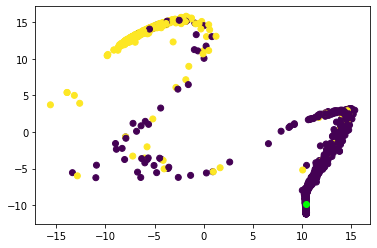

In [ ]:
from scipy import spatial
tree = spatial.KDTree(encodings)

encodings = np.asarray(encodings)

new_msg  = "Passwort passwort password kennwort"
new_embd = embed_message(new_msg, tokenizer, model)
ae.eval()
embd_device = torch.tensor(new_embd).to(device)
new_encoding = ae.encode(embd_device)

new_encoding = new_encoding.detach().cpu().numpy()
#new_labels = np.asarray(new_labels)
plt.scatter(encodings[:, 0], encodings[:, 1], c = labels2)
plt.scatter(new_encoding[0], new_encoding[1], c="lime")
id = tree.query(new_encoding)[1]

In [ ]:
print(encodings[8])
print(labels2[8])

print(df[df.index==id].initial_message.item())

[14.10105    0.9738262]
0
 Hello, we would like client 919 refreshed.  We also noticed yesterday when we had a lesson with ERPsim that all accounts were locked. We had to log in as an administrator and unlock all accounts. Is this something we have to do normally?  kind regards ----------------------------------- Mr. Smith Business IT Lab, Business Administration School of Business, Economics and Law Vasagatan 1, P O Box 115, SE 405 30 Gothenburg Tel: +46-31-786 44 02
